##### Import libraries

In [1]:
from Detector import Detector
from Vectorizer import Vectorizer
from Classifier import Classifier

import numpy as np
import cv2
import matplotlib.pyplot as plt


Using TensorFlow backend.


##### Load Bartender modules

In [2]:
detector = Detector()
vectorizer = Vectorizer()
classifier = Classifier()

Instructions for updating:
Colocations handled automatically by placer.


##### Load image and resize it

In [3]:
image = cv2.imread('../../../images/4.png', cv2.IMREAD_COLOR)
image_resized = cv2.resize(image, (300,300))
print('image.shape : ', image.shape)
print('image_resized.shape : ', image_resized.shape)

image.shape :  (411, 622, 3)
image_resized.shape :  (300, 300, 3)


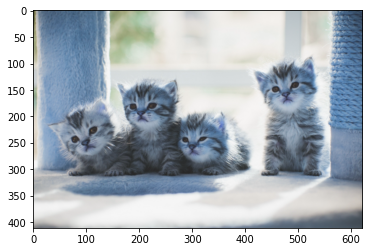

In [4]:
plt.imshow(image)

##### 1. Object Detector

In [5]:
objects = detector.get_objects(image)
for object in objects:
    print(object)

1/1 [==============================] - 1s 999ms/step
{'r': 148, 'c': 52, 'len_r': 162, 'len_c': 238, 'label': 'Cat'}
{'r': 79, 'c': 404, 'len_r': 227, 'len_c': 161, 'label': 'Cat'}


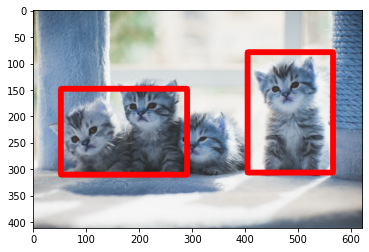

In [6]:
canvas = image.copy()
for object in objects:
    cv2.rectangle(canvas, (object['c'], object['r']), (object['c']+object['len_c'], object['r'] + object['len_r']), (255,0,0), 10)
    
plt.imshow(canvas)

##### 2. Object Vectorizer

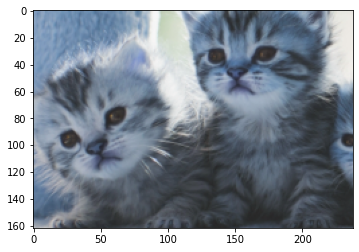

In [7]:
object_imgs = [ image[object['r']:object['r']+object['len_r'] , object['c']:object['c']+object['len_c']] for object in objects ]

plt.imshow(object_imgs[0])

In [8]:
object_vectors=[]
for object_img in object_imgs:
    object_img_resized = cv2.resize(np.array(object_img), (28,28), interpolation = cv2.INTER_AREA )       
    input_img = cv2.cvtColor(object_img_resized, cv2.COLOR_BGR2GRAY)
    object_vector = vectorizer.get_vector(input_img)
    object_vectors.append(object_vector)
    
print(object_vectors[1])    

[array([[ 1.1315889 , -0.94617957,  0.11198065, -2.1071036 ]],
      dtype=float32), array([[ 1.0728381, -1.9180092, -3.836949 , -1.9111129]], dtype=float32)]


##### 3. Vector Classifier

In [11]:
object_labels=[]
for object_vector in object_vectors:
    object_label = classifier.get_label(object_vector[0])
    object_labels.append(object_label)

print(object_labels)

[0, 8]
